# Download the dataset

In [222]:
import os
from zipfile import ZipFile
PATH_TO_ZIP = os.path.join("..", "dataset")
PATH_TO_CSV = os.path.join("..", "dataset")
with ZipFile(os.path.join(PATH_TO_ZIP, "archive.zip"), "r") as z_obj:
    z_obj.extractall(PATH_TO_CSV)

In [223]:
import pandas as pd
spam_ham_df = pd.read_csv(os.path.join(PATH_TO_CSV, "spam_or_not_spam.csv"))

# Exploratory Data Analysis

## Quick Glance

In [224]:
spam_ham_df.head(5) # 0 is ham; 1 is spam

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [225]:
spam_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


## Check for null values

In [226]:
spam_ham_df.isnull()

,email,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [227]:
null_mask = spam_ham_df.isnull()
rows_with_nulls = spam_ham_df[null_mask.any(axis=1)]
rows_with_nulls

,email,label
2966,NaN,1


In [228]:
# remove the row with null value for email
spam_ham_df = spam_ham_df.dropna()
spam_ham_df.reset_index(inplace=True)

In [229]:
spam_ham_df.isnull().sum()

index    0
email    0
label    0
dtype: int64

## Create a test set

In [230]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(spam_ham_df, spam_ham_df["label"]):
    strat_train_set = spam_ham_df.loc[train_index]
    trat_test_set = spam_ham_df.loc[test_index]

## Distribution of Labels

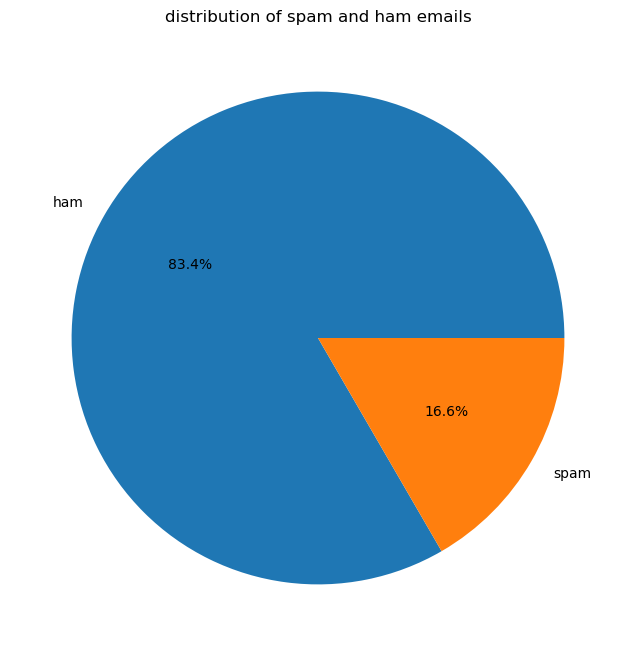

In [231]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.pie(spam_ham_df["label"].value_counts(), labels=["spam" if i == 1 else "ham" for i in spam_ham_df["label"].value_counts().index], autopct="%1.1f%%")
plt.title("distribution of spam and ham emails")
plt.show()

In [232]:
spam_ham_df["label"].value_counts().index

Index([0, 1], dtype='int64', name='label')

## Text Data Exploration

In [233]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.tokenize import word_tokenize, sent_tokenize

spam_ham_df.loc[:, ('num_characters')] = spam_ham_df['email'].apply(len)
spam_ham_df.loc[:, ("num_words")] = spam_ham_df["email"].apply(word_tokenize).apply(len)
spam_ham_df.loc[:, ("num_sentences")] = spam_ham_df["email"].apply(sent_tokenize).apply(len)
spam_ham_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17var\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17var\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,index,email,label,num_characters,num_words,num_sentences
0,0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,3,klez the virus that won t die already the most...,0,1015,169,1
4,4,in adding cream to spaghetti carbonara which ...,0,771,144,1
...,...,...,...,...,...,...
2994,2995,abc s good morning america ranks it the NUMBE...,1,561,96,1
2995,2996,hyperlink hyperlink hyperlink let mortgage le...,1,468,79,1
2996,2997,thank you for shopping with us gifts for all ...,1,864,154,1
2997,2998,the famous ebay marketing e course learn to s...,1,4129,747,1


In [234]:
spam_ham_df.groupby("label")["num_characters"].describe()

# Inference - spam emails are longer than ham emails

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,2500.0,1233.672000,3101.999287,5.0,360.0,719.0,1280.25,82994.0
1,499.0,2313.669339,9817.766265,1.0,525.0,956.0,1941.00,200408.0


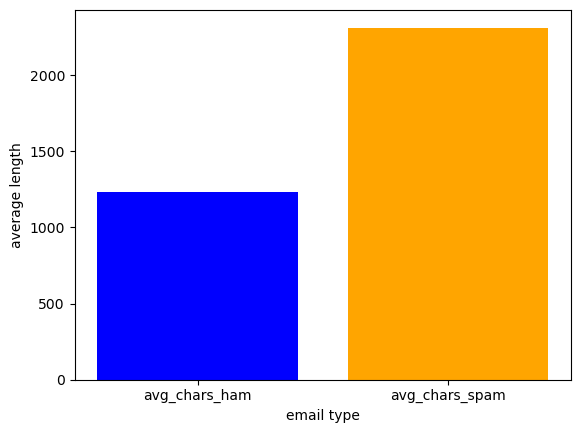

In [235]:
# Average length of emails
avg_chars_spam = spam_ham_df[spam_ham_df["label"] == 1]["num_characters"].mean()
avg_chars_ham = spam_ham_df[spam_ham_df["label"] == 0]["num_characters"].mean()

plt.bar(["avg_chars_ham", "avg_chars_spam"], [avg_chars_ham, avg_chars_spam], color=["blue", "orange"])
plt.xlabel("email type")
plt.ylabel("average length")
plt.show()

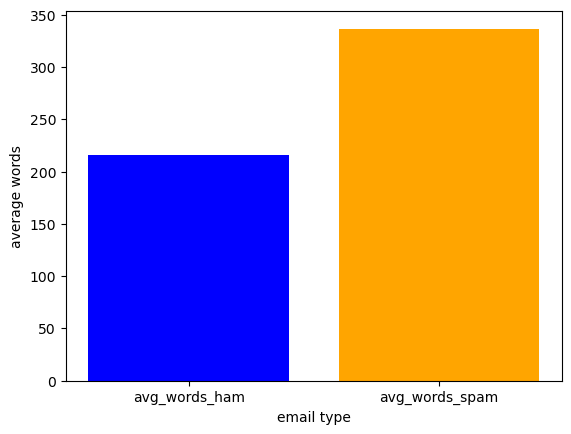

In [236]:
# Average words of emails
avg_words_spam = spam_ham_df[spam_ham_df["label"] == 1]["num_words"].mean()
avg_words_ham = spam_ham_df[spam_ham_df["label"] == 0]["num_words"].mean()

plt.bar(["avg_words_ham", "avg_words_spam"], [avg_words_ham, avg_words_spam], color=["blue", "orange"])
plt.xlabel("email type")
plt.ylabel("average words")
plt.show()

In [237]:
# Correlation between length of email and its type
corr = spam_ham_df["num_characters"].corr((spam_ham_df["label"] == 1).astype(int))
print("Correlation between email length and spam classification", corr)

# inference - correlation is positive but not strong

Correlation between email length and spam classification 0.08178746502103877


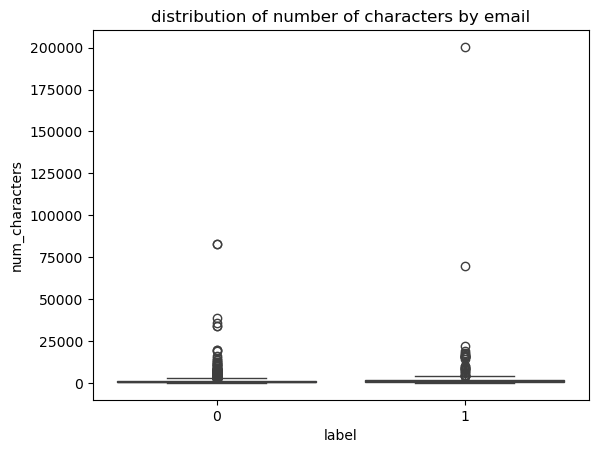

In [238]:
import seaborn as sns
sns.boxplot(x="label", y= "num_characters", data=spam_ham_df)
plt.title("distribution of number of characters by email")
plt.show()

# We have some outliers

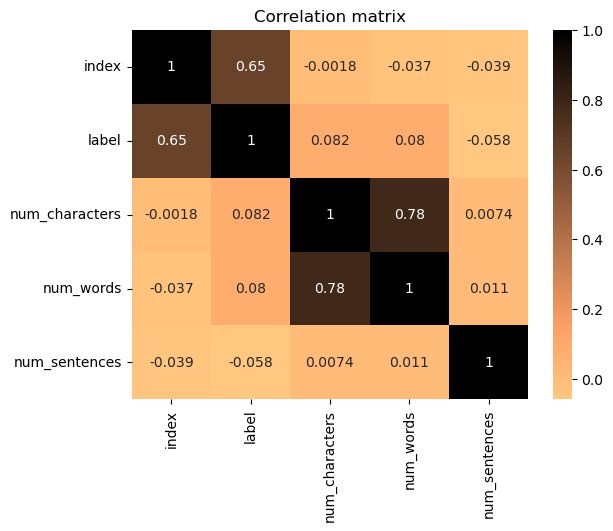

In [239]:
# Correlation matrix
corr_mat = spam_ham_df.corr(numeric_only=True)

sns.heatmap(corr_mat, cmap="copper_r", annot=True)
plt.title("Correlation matrix")
plt.show()

# Data Preprocessing

## Data Cleaning

In [240]:
spam_ham_df_pre = spam_ham_df

In [241]:
from scipy import stats
import numpy as np

# From EDA, we found that the some emails are very long (outliers), so we're gonna remove such outliers
def remove_outliers(df, col, threshold):
    df = df[df[col] <= threshold]
    return df

def remove_outliers_z_score(df, col, z_threshold):
    df["z"] = np.abs(stats.zscore(df[col]))
    df = df[df["z"] <= z_threshold]
    return df

In [242]:
spam_ham_df_pre = remove_outliers(spam_ham_df_pre, "num_characters", 2100)

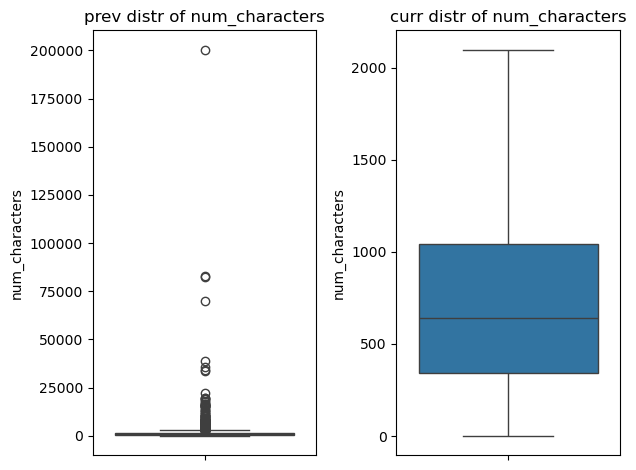

In [243]:
fig, ax = plt.subplots(1, 2)
ax = ax.flatten()
sns.boxplot(spam_ham_df["num_characters"], ax=ax[0])
ax[0].set_title("prev distr of num_characters")

sns.boxplot(spam_ham_df_pre["num_characters"], ax=ax[1])
ax[1].set_title("curr distr of num_characters")
plt.tight_layout()
plt.show()

## Feature Selection

In [244]:
# Drop num_sentences
spam_ham_df_pre = spam_ham_df_pre.drop("num_sentences", axis=1)

## Feature Engineering

In [245]:
# Convert to lower case
# Tokenize with words
# Remove special characters
# Remove stop words and punctuation
# Reduce words to their base form (stemming)
# Convert preprocessed data back to string